In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *
from mizani.formatters import percent_format

In [2]:
bechdel_detailed_df = pd.read_csv('C:\Projects Shata\Bechdel-Test\Final_Bechdel_detailed.csv', index_col=0)
bechdel_detailed_df.rename(columns={'rating': 'bt_score'}, inplace=True) # I find the name rating a little confusing
bechdel_detailed_df

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
0,A Quiet Place: Day One,2024.0,1.0,0.0,13433802.0,11424.0,22109.0,2024-07-29 01:30:13,1.0
1,Deadpool &amp; Wolverine,2024.0,1.0,0.0,6263850.0,11422.0,22107.0,2024-07-27 05:16:38,1.0
2,Twisters,2024.0,3.0,0.0,12584954.0,11418.0,22099.0,2024-07-21 23:43:06,1.0
3,Ullozhukku,2024.0,3.0,0.0,32537777.0,11414.0,22087.0,2024-07-17 02:38:55,1.0
4,"Fall Guy, The",2024.0,3.0,0.0,1684562.0,11411.0,22082.0,2024-07-15 18:29:46,1.0
...,...,...,...,...,...,...,...,...,...
4177,Green Zone,2010.0,0.0,0.0,947810.0,704.0,469.0,2010-03-16 22:39:52,1.0
4178,Our Family Wedding,2010.0,3.0,0.0,1305583.0,702.0,466.0,2010-03-15 21:36:54,1.0
4179,Alice in Wonderland,2010.0,3.0,0.0,1014759.0,699.0,460.0,2010-03-11 20:52:48,1.0
4180,"Crazies, The",2010.0,3.0,0.0,455407.0,694.0,455.0,2010-03-01 01:20:41,1.0


In [3]:
bechdel_detailed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4181 entries, 0 to 4181
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4181 non-null   object 
 1   year         4181 non-null   float64
 2   bt_score     4181 non-null   float64
 3   dubious      4181 non-null   float64
 4   imdbid       4181 non-null   float64
 5   id           4181 non-null   float64
 6   submitterid  4181 non-null   float64
 7   date         4181 non-null   object 
 8   visible      4181 non-null   float64
dtypes: float64(7), object(2)
memory usage: 326.6+ KB


In [4]:
bechdel_detailed_df = bechdel_detailed_df.dropna().reset_index(drop=True)
len(bechdel_detailed_df)

4181

In [5]:
bechdel_detailed_df.duplicated().sum()

2

In [6]:

bechdel_detailed_df[bechdel_detailed_df.duplicated()]

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
2871,Puella Magi Madoka Magica the Movie Part III: ...,2013.0,3.0,0.0,2457282.0,4980.0,9023.0,2013-12-24 20:34:24,1.0
3520,Last Call at the Oasis,2011.0,3.0,0.0,2043900.0,4889.0,8867.0,2013-11-29 21:16:54,1.0


In [7]:
bechdel_detailed_df.drop_duplicates(inplace=True)
bechdel_detailed_df = bechdel_detailed_df.reset_index(drop=True)
bechdel_detailed_df

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
0,A Quiet Place: Day One,2024.0,1.0,0.0,13433802.0,11424.0,22109.0,2024-07-29 01:30:13,1.0
1,Deadpool &amp; Wolverine,2024.0,1.0,0.0,6263850.0,11422.0,22107.0,2024-07-27 05:16:38,1.0
2,Twisters,2024.0,3.0,0.0,12584954.0,11418.0,22099.0,2024-07-21 23:43:06,1.0
3,Ullozhukku,2024.0,3.0,0.0,32537777.0,11414.0,22087.0,2024-07-17 02:38:55,1.0
4,"Fall Guy, The",2024.0,3.0,0.0,1684562.0,11411.0,22082.0,2024-07-15 18:29:46,1.0
...,...,...,...,...,...,...,...,...,...
4174,Green Zone,2010.0,0.0,0.0,947810.0,704.0,469.0,2010-03-16 22:39:52,1.0
4175,Our Family Wedding,2010.0,3.0,0.0,1305583.0,702.0,466.0,2010-03-15 21:36:54,1.0
4176,Alice in Wonderland,2010.0,3.0,0.0,1014759.0,699.0,460.0,2010-03-11 20:52:48,1.0
4177,"Crazies, The",2010.0,3.0,0.0,455407.0,694.0,455.0,2010-03-01 01:20:41,1.0


In [8]:
bechdel_detailed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4179.0,2.015471e+03,3.799965e+00,2009.0,2012.0,2015.0,2018.0,2.024000e+03
bt_score,4179.0,2.294807e+00,1.025150e+00,0.0,1.0,3.0,3.0,3.000000e+00
dubious,4179.0,9.978464e-02,2.997485e-01,0.0,0.0,0.0,0.0,1.000000e+00
imdbid,4179.0,6.019648e+06,9.485382e+07,102411.0,1707388.5,2808680.0,5903300.0,6.129999e+09
id,4179.0,6.998820e+03,2.709456e+03,694.0,4957.5,7204.0,9140.5,1.142800e+04
submitterid,4179.0,1.334975e+04,5.687760e+03,455.0,8988.5,14112.0,18023.0,2.211800e+04
visible,4179.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.000000e+00


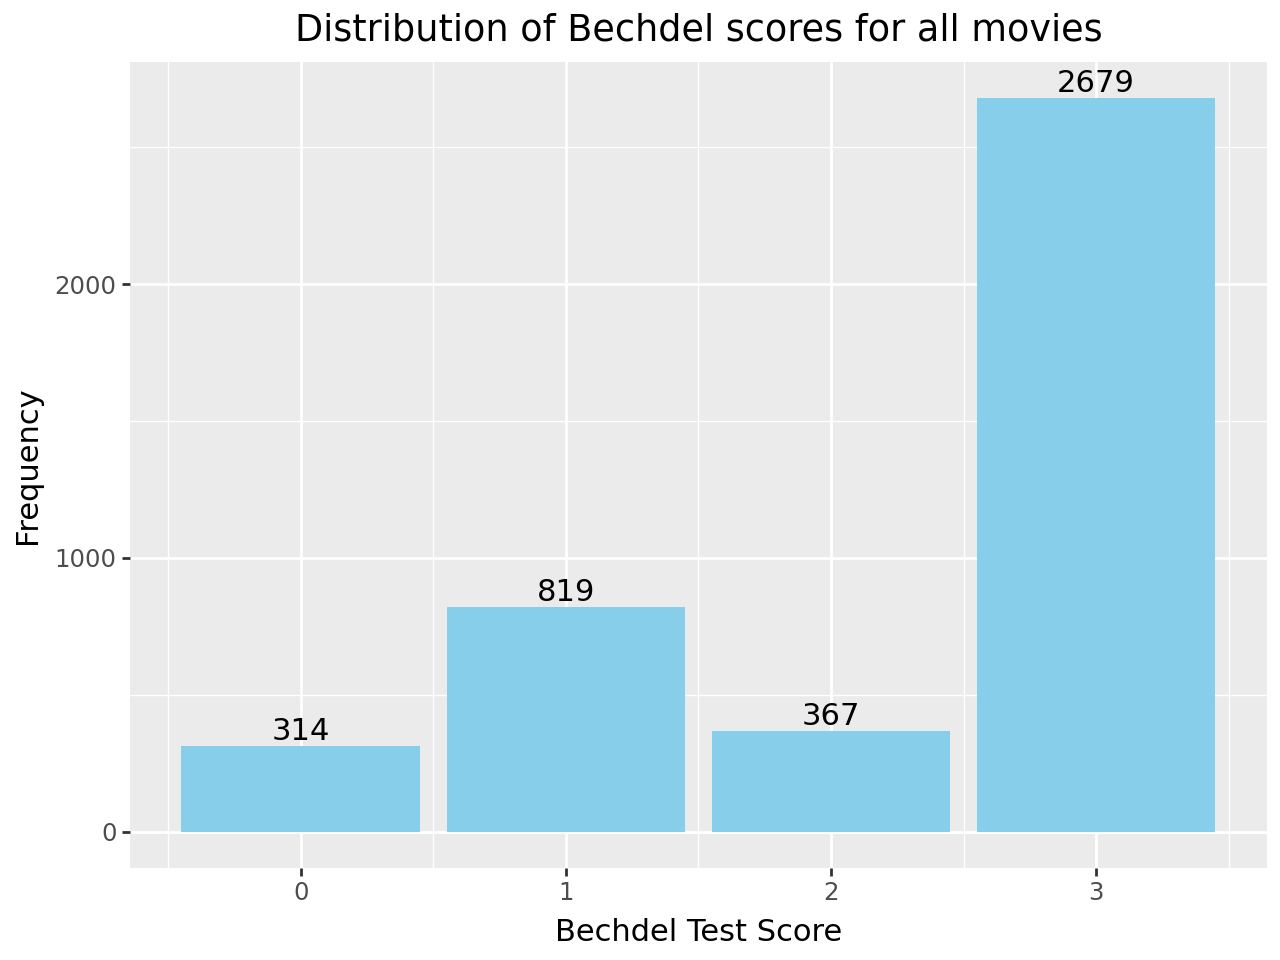

In [10]:
# ANALYSIS & VISUALIZATION

## Distribution of all bt score

(ggplot(bechdel_detailed_df, aes(x = 'bt_score')) + 
    geom_bar(fill = 'skyblue') + 
    geom_text(
        aes(label = after_stat('count')),
        stat = 'count',
        nudge_y = 0.125,
        va = 'bottom'
    ) +
    labs(
        title = 'Distribution of Bechdel scores for all movies',
        x = 'Bechdel Test Score',
        y = 'Frequency'
    )
)

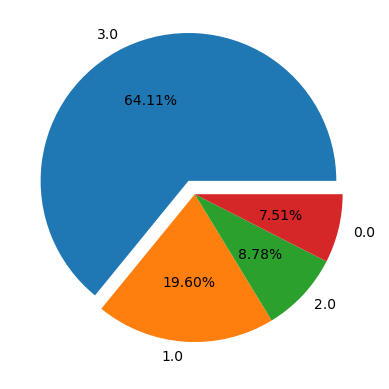

In [11]:
score_count_series = bechdel_detailed_df['bt_score'].value_counts()
gap = [0.1, 0, 0, 0]
plt.pie(np.array(score_count_series), labels = score_count_series.index, explode = gap, autopct='%.2f%%')
plt.show() 

In [13]:
# DUBIOUS PROPORTION

dubious_count = bechdel_detailed_df['dubious'].value_counts()
print('Percentage of dubious movie scores:', str('{:.2f}'.format(dubious_count[1.0] / (dubious_count[1.0] + dubious_count[0.0]) * 100))+'%')

Percentage of dubious movie scores: 9.98%


In [14]:
dubious_movies = bechdel_detailed_df[bechdel_detailed_df['dubious'] == 1]
dubious_movies

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
15,Inside Out 2,2024.0,3.0,1.0,22022452.0,11374.0,22024.0,2024-06-17 21:45:59,1.0
28,Road House,2024.0,3.0,1.0,3359350.0,11303.0,21900.0,2024-03-25 11:41:18,1.0
35,Dune: Part Two,2024.0,3.0,1.0,15239678.0,11277.0,21858.0,2024-02-29 03:37:39,1.0
36,Lisa Frankenstein,2024.0,2.0,1.0,21188080.0,11276.0,21857.0,2024-02-28 14:00:47,1.0
55,"Bricklayer, The",2023.0,3.0,1.0,2016303.0,11334.0,21956.0,2024-04-21 18:05:18,1.0
...,...,...,...,...,...,...,...,...,...
4108,Inception,2010.0,3.0,1.0,1375666.0,1169.0,1228.0,2010-07-13 15:21:23,1.0
4146,Toy Story 3,2010.0,3.0,1.0,435761.0,961.0,964.0,2010-06-18 23:09:00,1.0
4148,"Karate Kid, The",2010.0,3.0,1.0,1155076.0,943.0,899.0,2010-06-14 03:30:46,1.0
4161,Letters to Juliet,2010.0,3.0,1.0,892318.0,823.0,652.0,2010-05-21 00:51:37,1.0


In [15]:
print('Proportion of movies scored 0:', str('{:.2f}'.format(sum(dubious_movies['bt_score'] == 0.0) / len(dubious_movies) * 100))+'%')
print('Proportion of movies scored 1:', str('{:.2f}'.format(sum(dubious_movies['bt_score'] == 1.0) / len(dubious_movies) * 100))+'%')
print('Proportion of movies scored 2:', str('{:.2f}'.format(sum(dubious_movies['bt_score'] == 2.0) / len(dubious_movies) * 100))+'%')
print('Proportion of movies scored 3:', str('{:.2f}'.format(sum(dubious_movies['bt_score'] == 3.0) / len(dubious_movies) * 100))+'%')

Proportion of movies scored 0: 2.16%
Proportion of movies scored 1: 8.87%
Proportion of movies scored 2: 12.23%
Proportion of movies scored 3: 76.74%


## This is tricky because nothing is certain... and humans hate uncertainty. But I do not really want to just discard this information. I think it is better to classify movies into 3 categories: passing, failing the Bechdel test and dubious.

In [18]:
for index, bt_score in bechdel_detailed_df['bt_score'].items():
    if bt_score == 0:
        if bechdel_detailed_df.at[index, 'dubious'] == 1:
            bechdel_detailed_df.at[index, 'category'] = 'Dubious'
        else:
            bechdel_detailed_df.at[index, 'category'] = '0-Fewer than two female characters'
    elif bt_score == 1:
        if bechdel_detailed_df.at[index, 'dubious'] == 1:
            bechdel_detailed_df.at[index, 'category'] = 'Dubious'
        else:
            bechdel_detailed_df.at[index, 'category'] = '1-Female characters do not talk'
    elif bt_score == 2:
        if bechdel_detailed_df.at[index, 'dubious'] == 1:
            bechdel_detailed_df.at[index, 'category'] = 'Dubious'
        else:
            bechdel_detailed_df.at[index, 'category'] = '2-Female characters talk about men'
    else:
        if bechdel_detailed_df.at[index, 'dubious'] == 1:
            bechdel_detailed_df.at[index, 'category'] = 'Dubious'
        else:
            bechdel_detailed_df.at[index, 'category'] = '3-Passes Bechdel Test'

In [19]:
bechdel_detailed_df.tail()

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,category
4174,Green Zone,2010.0,0.0,0.0,947810.0,704.0,469.0,2010-03-16 22:39:52,1.0,0-Fewer than two female characters
4175,Our Family Wedding,2010.0,3.0,0.0,1305583.0,702.0,466.0,2010-03-15 21:36:54,1.0,3-Passes Bechdel Test
4176,Alice in Wonderland,2010.0,3.0,0.0,1014759.0,699.0,460.0,2010-03-11 20:52:48,1.0,3-Passes Bechdel Test
4177,"Crazies, The",2010.0,3.0,0.0,455407.0,694.0,455.0,2010-03-01 01:20:41,1.0,3-Passes Bechdel Test
4178,Hamlet,2009.0,1.0,0.0,1449175.0,11391.0,22051.0,2024-06-26 22:37:44,1.0,1-Female characters do not talk


## Changes over the years
Is the average of Bechdel score rising?
Is the proportion of movies passing the Bechdel test rising?

In [21]:

bechdel_year_mean = bechdel_detailed_df.groupby(['year'])['bt_score'].mean().to_frame().reset_index()# bechdel_year_mean.rename(columns={'bt_score': 'mean_bt_score'}, inplace=True)
bechdel_year_mean

,year,bt_score
0,2009.0,1.000000
1,2010.0,2.143646
2,2011.0,2.233596
3,2012.0,2.300836
4,2013.0,2.291169
5,2014.0,2.243243
6,2015.0,2.241983
7,2016.0,2.294294
8,2017.0,2.355634
9,2018.0,2.285714


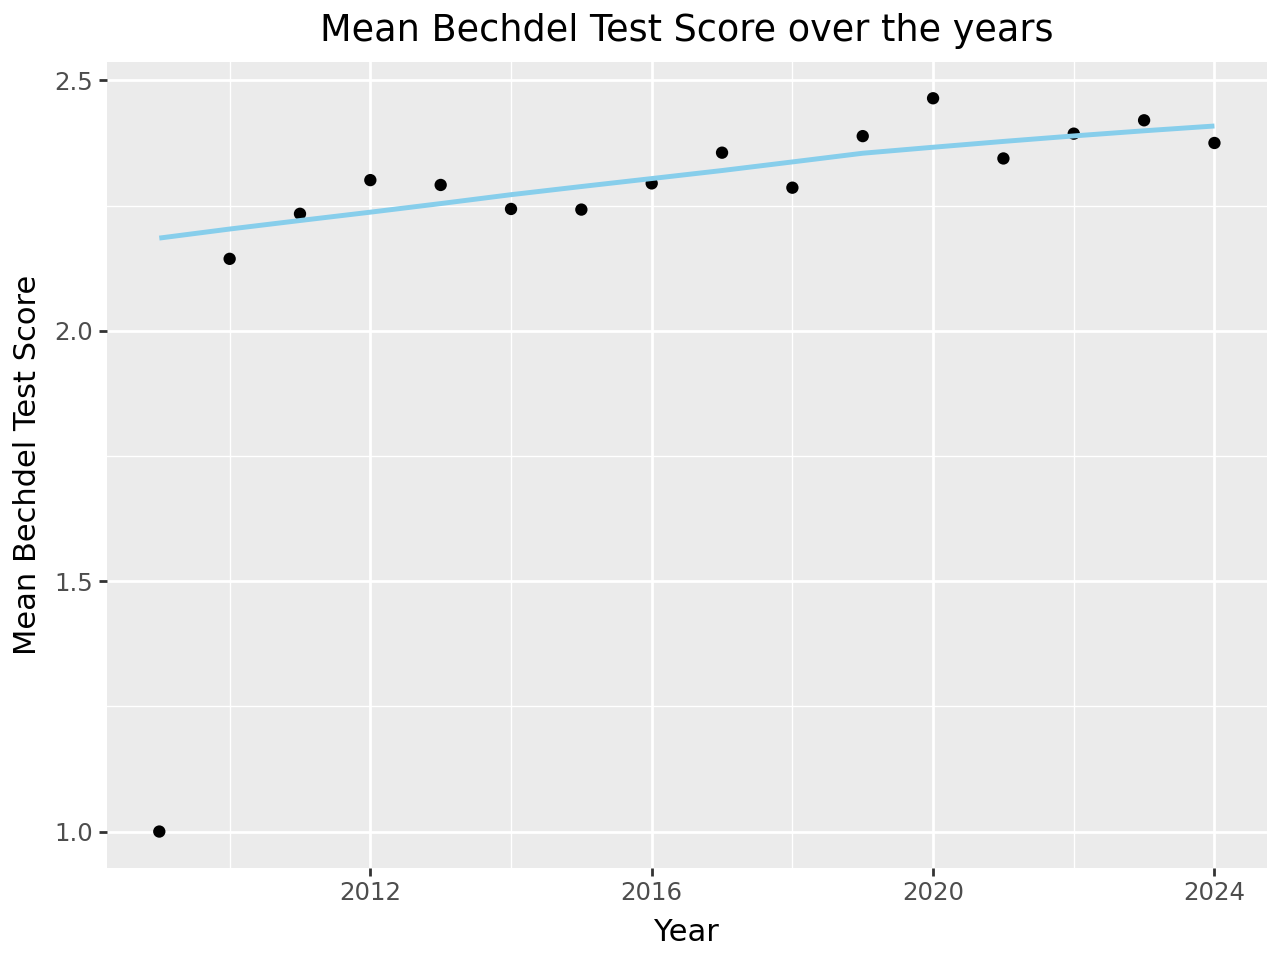

In [65]:
# geom_smooth() is an estimate of the conditional mean function. 
# It draws a curve and gives you a general trend of the data
(ggplot(bechdel_year_mean, aes(x = 'year', y = 'bt_score')) + 
    geom_point() + 
    geom_smooth(method='lowess', color='skyblue', se=False) + 
    labs(
        title = 'Mean Bechdel Test Score over the years',
        x = 'Year', 
        y = 'Mean Bechdel Test Score'
    )
)

In [23]:
# # first get total count of movies released in each year
# bechdel_year_proportion = bechdel_df.groupby(['year'])['bt_score'].count().to_frame().reset_index()
# bechdel_year_proportion.rename(columns={'bt_score': 'total_count'}, inplace=True)
# bechdel_year_proportion

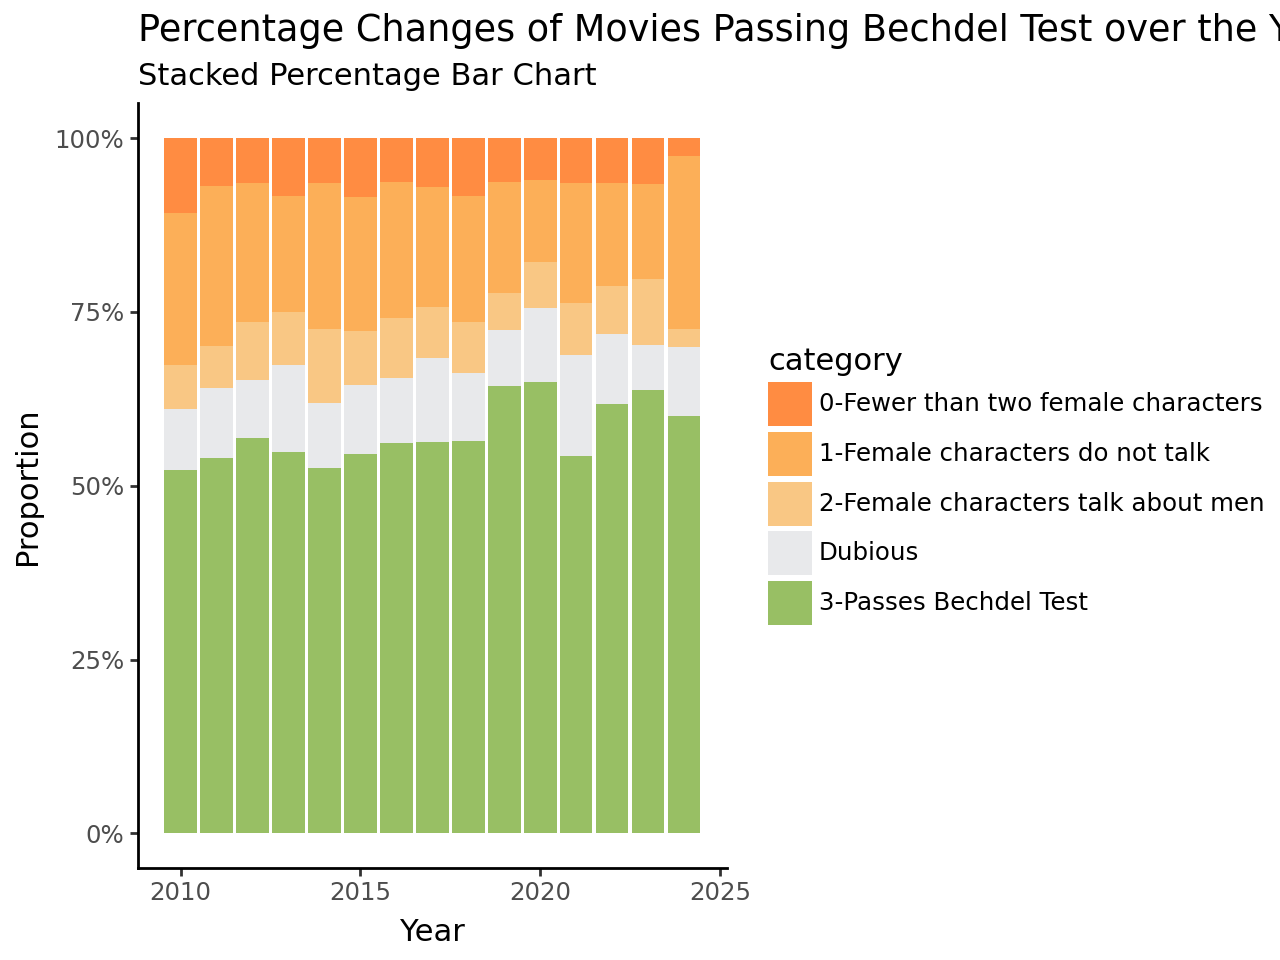

In [59]:
# fitting all the years in the graph looks terrible
# Here I selected the data between 1950-2000 to make it a little better, but it is still not good
(ggplot(bechdel_df_ordered[(bechdel_df_ordered['year'] >= 2010) & (bechdel_df_ordered['year'] <= 2024)], 
        aes(fill = 'category', x = 'year')) + 
    geom_bar(position = "fill") + 
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = ['#FF8C42', '#FCAF58', '#F9C784', '#E8E9EB', '#98BF64']) +
    labs(
        title = 'Percentage Changes of Movies Passing Bechdel Test over the Years', 
        subtitle = 'Stacked Percentage Bar Chart',
        x = 'Year', 
        y = 'Proportion'
    ) + 
    theme_classic()
)

In [30]:
# Adding a new column that segment the years in to 10-year intervals
for index, year in bechdel_df_ordered['year'].items():
    interval_start = int(year - year % 10 + 1)
    interval_end = int(interval_start + 9)
    bechdel_df_ordered.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)
bechdel_df_ordered

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,category,year_interval
0,A Quiet Place: Day One,2024.0,1.0,0.0,13433802.0,11424.0,22109.0,2024-07-29 01:30:13,1.0,1-Female characters do not talk,2021-2030
1,Deadpool &amp; Wolverine,2024.0,1.0,0.0,6263850.0,11422.0,22107.0,2024-07-27 05:16:38,1.0,1-Female characters do not talk,2021-2030
2,Twisters,2024.0,3.0,0.0,12584954.0,11418.0,22099.0,2024-07-21 23:43:06,1.0,3-Passes Bechdel Test,2021-2030
3,Ullozhukku,2024.0,3.0,0.0,32537777.0,11414.0,22087.0,2024-07-17 02:38:55,1.0,3-Passes Bechdel Test,2021-2030
4,"Fall Guy, The",2024.0,3.0,0.0,1684562.0,11411.0,22082.0,2024-07-15 18:29:46,1.0,3-Passes Bechdel Test,2021-2030
...,...,...,...,...,...,...,...,...,...,...,...
4174,Green Zone,2010.0,0.0,0.0,947810.0,704.0,469.0,2010-03-16 22:39:52,1.0,0-Fewer than two female characters,2011-2020
4175,Our Family Wedding,2010.0,3.0,0.0,1305583.0,702.0,466.0,2010-03-15 21:36:54,1.0,3-Passes Bechdel Test,2011-2020
4176,Alice in Wonderland,2010.0,3.0,0.0,1014759.0,699.0,460.0,2010-03-11 20:52:48,1.0,3-Passes Bechdel Test,2011-2020
4177,"Crazies, The",2010.0,3.0,0.0,455407.0,694.0,455.0,2010-03-01 01:20:41,1.0,3-Passes Bechdel Test,2011-2020


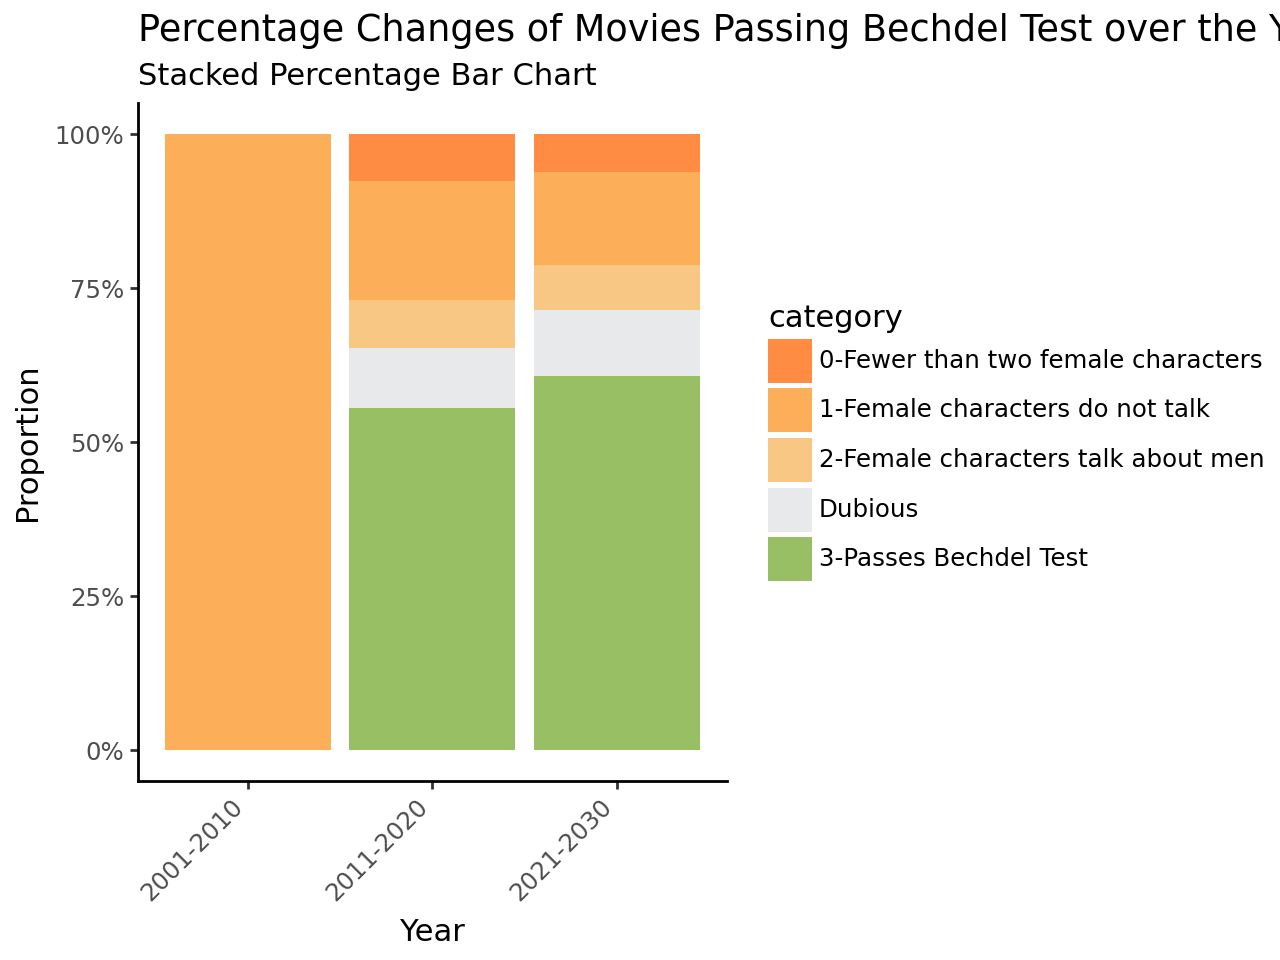

In [61]:
(ggplot(bechdel_df_ordered, 
        aes(fill = 'category', x = 'year_interval')) + 
    geom_bar(position = "fill") + 
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = ['#FF8C42', '#FCAF58', '#F9C784', '#E8E9EB', '#98BF64']) +
    labs(
        title = 'Percentage Changes of Movies Passing Bechdel Test over the Years', 
        subtitle = 'Stacked Percentage Bar Chart',
        x = 'Year', 
        y = 'Proportion'
    ) + 
    theme_classic() + 
    theme(axis_text_x  = element_text(angle = 45, hjust = 1))
)

# GIF Visualization

In [66]:
from matplotlib.animation import FuncAnimation

In [68]:
bechdel_pie = bechdel_detailed_df.groupby(['year'])['bt_score'].count().to_frame().reset_index()
bechdel_pie.rename(columns={'bt_score': 'total'}, inplace=True)
# add counts of 0's
bechdel_pie_0 = bechdel_detailed_df[bechdel_detailed_df['category'] == '0-Fewer than two female characters'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_0.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['0']] = value_count
# add counts of 1's
bechdel_pie_1 = bechdel_detailed_df[bechdel_detailed_df['category'] == '1-Female characters do not talk'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_1.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['1']] = value_count
# add counts of 2's
bechdel_pie_2 = bechdel_detailed_df[bechdel_detailed_df['category'] == '2-Female characters talk about men'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_2.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['2']] = value_count
# add counts of Dubious's
bechdel_pie_d = bechdel_detailed_df[bechdel_detailed_df['category'] == 'Dubious'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_d.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['Dubious']] = value_count
# add counts of 3's
bechdel_pie_3 = bechdel_detailed_df[bechdel_detailed_df['category'] == '3-Passes Bechdel Test'].groupby('year')['bt_score'].count()
for index_year, value_count in bechdel_pie_3.items():
    bechdel_pie.loc[bechdel_pie['year'] == index_year, ['3']] = value_count
# fill all the empty values with 0's
bechdel_pie = bechdel_pie.fillna(0)

# check if counts match up
for index, total in bechdel_pie['total'].items():
    assert bechdel_pie.at[index, '0'] + bechdel_pie.at[index, '1'] + bechdel_pie.at[index, '2'] + bechdel_pie.at[index, 'Dubious'] + bechdel_pie.at[index, '3'] == bechdel_pie.at[index, 'total']
bechdel_pie

,year,total,0,1,2,Dubious,3
0,2009.0,1,0.0,1.0,0.0,0.0,0.0
1,2010.0,362,39.0,79.0,23.0,32.0,189.0
2,2011.0,381,26.0,88.0,23.0,38.0,206.0
3,2012.0,359,23.0,72.0,30.0,30.0,204.0
4,2013.0,419,35.0,70.0,32.0,52.0,230.0
5,2014.0,407,26.0,86.0,43.0,38.0,214.0
6,2015.0,343,29.0,66.0,27.0,34.0,187.0
7,2016.0,333,21.0,65.0,29.0,31.0,187.0
8,2017.0,284,20.0,49.0,21.0,34.0,160.0
9,2018.0,287,24.0,52.0,21.0,28.0,162.0


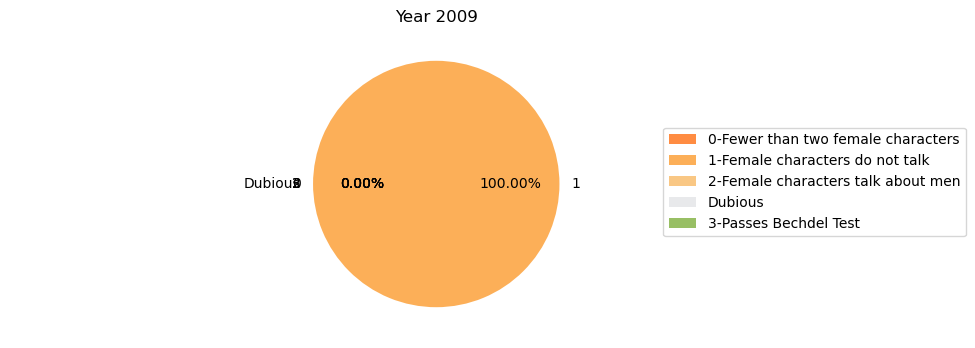

In [69]:
counts_title = np.array(bechdel_pie[['0', '1', '2', 'Dubious', '3', 'year']])

colors = ['#FF8C42', '#FCAF58', '#F9C784', '#E8E9EB', '#98BF64']
labels = ["0", "1", "2", "Dubious", "3"]
gap = [0, 0, 0, 0, 0]

fig, ax = plt.subplots(figsize=(11,4))
fig.subplots_adjust(wspace=None, hspace=None)

def update(num):
    z = np.array(counts_title[num][:-1]).astype(float)
    ax.clear()
    ax.axis('equal')
    ax.pie(z, explode=gap, labels=labels, colors=colors, autopct='%1.2f%%', shadow=False, startangle=180)
    ax.legend(['0-Fewer than two female characters',
                '1-Female characters do not talk',
                '2-Female characters talk about men',
                'Dubious', 
                '3-Passes Bechdel Test'], 
                bbox_to_anchor=(1,0.5), 
                loc="center right", 
                fontsize=10, 
                bbox_transform=plt.gcf().transFigure
                )
    ax.set_title('Year ' + str(int(counts_title[num][-1])))
    ax.margins(1, 0)

ani = FuncAnimation(fig, update, frames=range(len(counts_title)), repeat=False)
ani.save('bechdel.gif', writer='pillow', fps=2)

# the working GIF is shown in another file

# Mean Percentage Change

In [36]:
bechdel_df_ordered.head()

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,category,year_interval
0,A Quiet Place: Day One,2024.0,1.0,0.0,13433802.0,11424.0,22109.0,2024-07-29 01:30:13,1.0,1-Female characters do not talk,2021-2030
1,Deadpool &amp; Wolverine,2024.0,1.0,0.0,6263850.0,11422.0,22107.0,2024-07-27 05:16:38,1.0,1-Female characters do not talk,2021-2030
2,Twisters,2024.0,3.0,0.0,12584954.0,11418.0,22099.0,2024-07-21 23:43:06,1.0,3-Passes Bechdel Test,2021-2030
3,Ullozhukku,2024.0,3.0,0.0,32537777.0,11414.0,22087.0,2024-07-17 02:38:55,1.0,3-Passes Bechdel Test,2021-2030
4,"Fall Guy, The",2024.0,3.0,0.0,1684562.0,11411.0,22082.0,2024-07-15 18:29:46,1.0,3-Passes Bechdel Test,2021-2030


In [37]:
bechdel_2010 = bechdel_df_ordered[bechdel_df_ordered['year'] >= 2010].reset_index(drop= True)
bechdel_2010

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,category,year_interval
0,A Quiet Place: Day One,2024.0,1.0,0.0,13433802.0,11424.0,22109.0,2024-07-29 01:30:13,1.0,1-Female characters do not talk,2021-2030
1,Deadpool &amp; Wolverine,2024.0,1.0,0.0,6263850.0,11422.0,22107.0,2024-07-27 05:16:38,1.0,1-Female characters do not talk,2021-2030
2,Twisters,2024.0,3.0,0.0,12584954.0,11418.0,22099.0,2024-07-21 23:43:06,1.0,3-Passes Bechdel Test,2021-2030
3,Ullozhukku,2024.0,3.0,0.0,32537777.0,11414.0,22087.0,2024-07-17 02:38:55,1.0,3-Passes Bechdel Test,2021-2030
4,"Fall Guy, The",2024.0,3.0,0.0,1684562.0,11411.0,22082.0,2024-07-15 18:29:46,1.0,3-Passes Bechdel Test,2021-2030
...,...,...,...,...,...,...,...,...,...,...,...
4173,Diary of a Wimpy Kid,2010.0,3.0,0.0,1196141.0,705.0,475.0,2010-03-22 21:58:30,1.0,3-Passes Bechdel Test,2011-2020
4174,Green Zone,2010.0,0.0,0.0,947810.0,704.0,469.0,2010-03-16 22:39:52,1.0,0-Fewer than two female characters,2011-2020
4175,Our Family Wedding,2010.0,3.0,0.0,1305583.0,702.0,466.0,2010-03-15 21:36:54,1.0,3-Passes Bechdel Test,2011-2020
4176,Alice in Wonderland,2010.0,3.0,0.0,1014759.0,699.0,460.0,2010-03-11 20:52:48,1.0,3-Passes Bechdel Test,2011-2020


In [39]:
count_2010_total = bechdel_2010.groupby('year')['bt_score'].count()
count_2010_total, len(count_2010_total)

(year
 2010.0    362
 2011.0    381
 2012.0    359
 2013.0    419
 2014.0    407
 2015.0    343
 2016.0    333
 2017.0    284
 2018.0    287
 2019.0    283
 2020.0    168
 2021.0    186
 2022.0    188
 2023.0    138
 2024.0     40
 Name: bt_score, dtype: int64,
 15)

In [41]:
bechdel_2010_pass = bechdel_2010[bechdel_2010['bt_score'] == 3].reset_index(drop=True)
# bechdel_2010_pass
count_2010_pass = bechdel_2010_pass.groupby('year')['bt_score'].count()
count_2010_pass, len(count_2010_pass)

(year
 2010.0    214
 2011.0    236
 2012.0    228
 2013.0    270
 2014.0    242
 2015.0    211
 2016.0    210
 2017.0    191
 2018.0    184
 2019.0    196
 2020.0    123
 2021.0    123
 2022.0    129
 2023.0     95
 2024.0     27
 Name: bt_score, dtype: int64,
 15)

In [43]:
ratio_pass_2010 = np.asarray(count_2010_pass) / np.asarray(count_2010_total)
ratio_pass_2010

array([0.59116022, 0.61942257, 0.63509749, 0.64439141, 0.59459459,
       0.61516035, 0.63063063, 0.67253521, 0.64111498, 0.69257951,
       0.73214286, 0.66129032, 0.68617021, 0.6884058 , 0.675     ])

In [44]:
ratio_changes = []
for index, ratio in enumerate(ratio_pass_2010):
    if index >= 1:
        ratio_changes.append(ratio - ratio_pass_2010[index - 1])
ratio_changes

[0.028262351184002554,
 0.01567492085773392,
 0.00929391507834676,
 -0.04979681351996379,
 0.02056575525963278,
 0.015470280776403222,
 0.041904580636975,
 -0.03142022868920846,
 0.05146452272195623,
 0.0395633518425037,
 -0.07085253456221197,
 0.024879890185312337,
 0.002235584335491758,
 -0.01340579710144918]

In [45]:
np.mean(ratio_changes)

0.005988555643251776